# Work through example together

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [1]:
import numpy as np
import tensorflow as tf

In [6]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**What's the primary difference between these two?**<br/>
The are both normal distributions but ones centered along the Y axis at \[0,3\] and the other is at \[3,0\] along the X-Axis. 
<br/><br/>

**What do we expect the data to look like?**<br/>
We know that for 2-D Multivariate distributions with no covariance 
appear as circles that grow less dense away from the centre. We think that
this would kind of be of the same form except an ellipse since, there is covariance
of magnitude 0.5. <br/><br/>

**Stacking the two classes into an array with shape (2000, 2)**

In [7]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**What type of argument does 'vstack' take?**<br/>
vstack takes an n-tuple of numpy matrices as its arguments. It always stacks along axis 0.<br/>

**What shape is this?**<br/>
The old shapes were 1000x2. The new shape is 2000x2. <br/>

**What's on the 0th axis?** <br/>
The rows of the matrix are on the 0th axis. This corresponds to each sample.<br/>

**What's on the 1th axis?** <br/>
The cols of the matrix are on the 1th axis. This corresponds to the features or in our case, the dimensions.<br/>

**Generating the corresponding targets (0 and 1)**

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class//2, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32"),
                    2*np.ones((num_samples_per_class//2, 1), dtype="float32")))


**What else are targets called?** <br/>
Targets are also called samples.<br/>

**What shape is this? Why?** <br/>
The shape of each target is 1x1. This is because each sample has 1 feature.<br/>

**Plotting the two point classes**

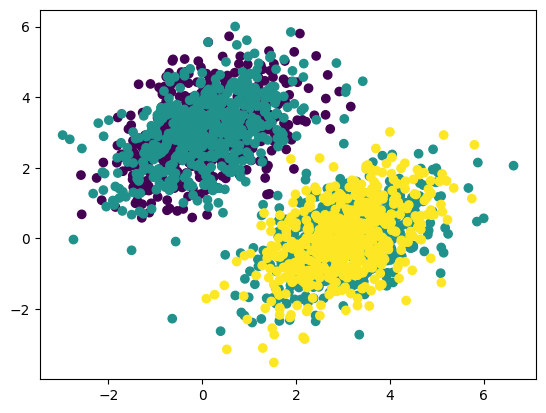

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# How did we deal with color here?

**Creating the linear classifier variables**

In [7]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# Why'd we define W and b as tf.Variables?

**The forward pass function**

In [8]:
def model(inputs):
    return tf.matmul(inputs, W) + b

# What does our model actually look like as a surface above feature space?
# Does the order of the matmul parameters matter?

**The mean squared error loss function**

In [9]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
# What does reduce_mean do?
# Does the axis we reduce along matter?
# There's no square root - does that change the shape of the loss surface?  
# Does that change the location to the maxima/minima?

**The training step function**

In [14]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
        # print(type(predictions)) # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# What does learning rate control?
# What are the variable types of inputs, targets, and predictions?
# Why do we care about the gradients of W and b?

**The batch training loop**

In [16]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")
    

# What happens if we run this fewer times?    
# Try to modify this to plot the loss

Loss at step 0: 0.0760
Loss at step 1: 0.0720
Loss at step 2: 0.0683
Loss at step 3: 0.0649
Loss at step 4: 0.0618
Loss at step 5: 0.0590
Loss at step 6: 0.0563
Loss at step 7: 0.0539
Loss at step 8: 0.0517
Loss at step 9: 0.0497
Loss at step 10: 0.0478
Loss at step 11: 0.0461
Loss at step 12: 0.0445
Loss at step 13: 0.0431
Loss at step 14: 0.0417
Loss at step 15: 0.0405
Loss at step 16: 0.0394
Loss at step 17: 0.0383
Loss at step 18: 0.0374
Loss at step 19: 0.0365
Loss at step 20: 0.0357
Loss at step 21: 0.0350
Loss at step 22: 0.0343
Loss at step 23: 0.0337
Loss at step 24: 0.0331
Loss at step 25: 0.0326
Loss at step 26: 0.0321
Loss at step 27: 0.0316
Loss at step 28: 0.0312
Loss at step 29: 0.0309
Loss at step 30: 0.0305
Loss at step 31: 0.0302
Loss at step 32: 0.0299
Loss at step 33: 0.0296
Loss at step 34: 0.0294
Loss at step 35: 0.0292
Loss at step 36: 0.0289
Loss at step 37: 0.0288
Loss at step 38: 0.0286
Loss at step 39: 0.0284


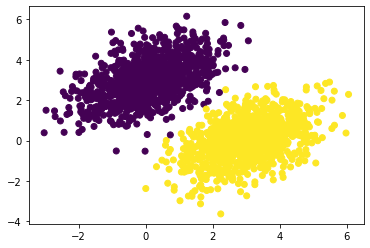

In [17]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()
# How would we expect this to change if the two labels were 1 and 2 (instead of 0 and 1)?
# Color the entire regions of each class in the square (so not just the input data points).  Hint (np.meshgrid())

# Try changing the model to include 2nd degree terms (e.g. W0*x + W1*y + W2*x**2 + W3*y**2 + b).

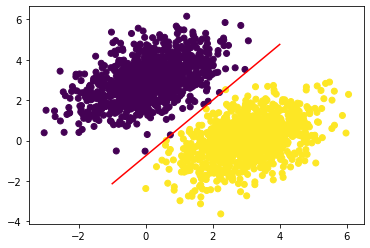

In [18]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)